In [1]:
import numpy as np
import pandas as pd
import Datasets as DS
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import euclidean_distances

# Loading data

In [2]:
dir = 'D:/Research/NeuroDAVIS/Results/'
X,y = DS.LoadData('FMnist')
y = y.reshape((y.shape[0],))

In [3]:
dir = 'D:/Research/NeuroDAVIS/Data/Embedding/'
X_tsne = pd.read_csv(dir+'FMnist_tSNE_60k_embedding.csv',header=0,index_col=0)
X_umap = pd.read_csv(dir+'FMnist_UMAP_60k_embedding.csv',header=0,index_col=0)
X_NeuroDAVIS = pd.read_csv(dir+'FMnist_NeuroDAVIS_60k_embedding.csv',header=0,index_col=0)
X_pca_tsne = pd.read_csv(dir+'FMnist_pca_tSNE_60k_embedding.csv',header=0,index_col=0)
X_pca_umap = pd.read_csv(dir+'FMnist_pca_UMAP_60k_embedding.csv',header=0,index_col=0)
X_pca_NeuroDAVIS = pd.read_csv(dir+'FMnist_pca_NeuroDAVIS_60k_embedding.csv',header=0,index_col=0)

In [4]:
def Find_Centroids(X,y):
    data = np.vstack((np.mean(X[y==0], axis = 0), 
                         np.mean(X[y==1], axis = 0),
                         np.mean(X[y==2], axis = 0), 
                         np.mean(X[y==3], axis = 0),
                         np.mean(X[y==4], axis = 0), 
                         np.mean(X[y==5], axis = 0),
                         np.mean(X[y==6], axis = 0), 
                         np.mean(X[y==7], axis = 0),
                         np.mean(X[y==8], axis = 0), 
                         np.mean(X[y==9], axis = 0)))
    return data

In [5]:
X_centroids = Find_Centroids(X,y)
X_tsne_centroids = Find_Centroids(X_tsne,y)
X_umap_centroids = Find_Centroids(X_umap,y)
X_NeuroDAVIS_centroids = Find_Centroids(X_NeuroDAVIS,y)
X_pca_tsne_centroids = Find_Centroids(X_pca_tsne,y)
X_pca_umap_centroids = Find_Centroids(X_pca_umap,y)
X_pca_NeuroDAVIS_centroids = Find_Centroids(X_pca_NeuroDAVIS,y)

In [6]:
dist_centroids_orig = np.square(euclidean_distances(X_centroids, X_centroids)).flatten()
dist_centroids_tsne = np.square(euclidean_distances(X_tsne_centroids, X_tsne_centroids)).flatten()
dist_centroids_umap = np.square(euclidean_distances(X_umap_centroids, X_umap_centroids)).flatten()
dist_centroids_NeuroDAVIS = np.square(euclidean_distances(X_NeuroDAVIS_centroids, X_NeuroDAVIS_centroids)).flatten()
dist_centroids_pca_tsne = np.square(euclidean_distances(X_pca_tsne_centroids, X_pca_tsne_centroids)).flatten()
dist_centroids_pca_umap = np.square(euclidean_distances(X_pca_umap_centroids, X_pca_umap_centroids)).flatten()
dist_centroids_pca_NeuroDAVIS = np.square(euclidean_distances(X_pca_NeuroDAVIS_centroids, X_pca_NeuroDAVIS_centroids)).flatten()

In [7]:
coef_centroids_tsne, p_centroids_tsne = spearmanr(dist_centroids_orig, dist_centroids_tsne)
coef_centroids_umap, p_centroids_umap = spearmanr(dist_centroids_orig, dist_centroids_umap)
coef_centroids_NeuroDAVIS, p_centroids_NeuroDAVIS = spearmanr(dist_centroids_orig, dist_centroids_NeuroDAVIS)
coef_centroids_pca_tsne, p_centroids_pca_tsne = spearmanr(dist_centroids_orig, dist_centroids_pca_tsne)
coef_centroids_pca_umap, p_centroids_pca_umap = spearmanr(dist_centroids_orig, dist_centroids_pca_umap)
coef_centroids_pca_NeuroDAVIS, p_centroids_pca_NeuroDAVIS = spearmanr(dist_centroids_orig, dist_centroids_pca_NeuroDAVIS)

In [8]:
print("corr_tsne = {}, p_val_tsne = {}".format(coef_centroids_tsne, p_centroids_tsne))
print("corr_umap = {}, p_val_umap = {}".format(coef_centroids_umap, p_centroids_umap))
print("corr_NeuroDAVIS = {}, p_val_NeuroDAVIS = {}".format(coef_centroids_NeuroDAVIS, p_centroids_NeuroDAVIS))
print("corr_pca_tsne = {}, p_val_pca_tsne = {}".format(coef_centroids_pca_tsne, p_centroids_pca_tsne))
print("corr_pca_umap = {}, p_val_pca_umap = {}".format(coef_centroids_pca_umap, p_centroids_pca_umap))
print("corr_pca_NeuroDAVIS = {}, p_val_pca_NeuroDAVIS = {}".format(coef_centroids_pca_NeuroDAVIS, p_centroids_pca_NeuroDAVIS))

corr_tsne = 0.7028408871591105, p_val_tsne = 3.6142038219406677e-16
corr_umap = 0.9193269790279017, p_val_umap = 1.7576975631023823e-41
corr_NeuroDAVIS = 0.9347103814835775, p_val_NeuroDAVIS = 8.043794113007193e-46
corr_pca_tsne = 0.7267811601338894, p_val_pca_tsne = 1.1315322526085246e-17
corr_pca_umap = 0.9379844030429279, p_val_pca_umap = 7.000697870906403e-47
corr_pca_NeuroDAVIS = 0.8624265510529979, p_val_pca_NeuroDAVIS = 9.774364498715554e-31


In [9]:
c1=list(np.unique(y))
c2=['blue', 'green', 'orange', 'red', 'yellow','pink', 'purple', 'aquamarine', 'gray', 'darkgreen','skyblue', 'lime', 'royalblue' , 'cyan', 'olive',
    'tomato', 'saddlebrown', 'sienna', 'navy', 'violet', 'crimson', 'greenyellow','coral','burlywood','slategrey']
cols = map(lambda x: c2[c1.index(x)], y)
cs = [i for i in list(cols)]

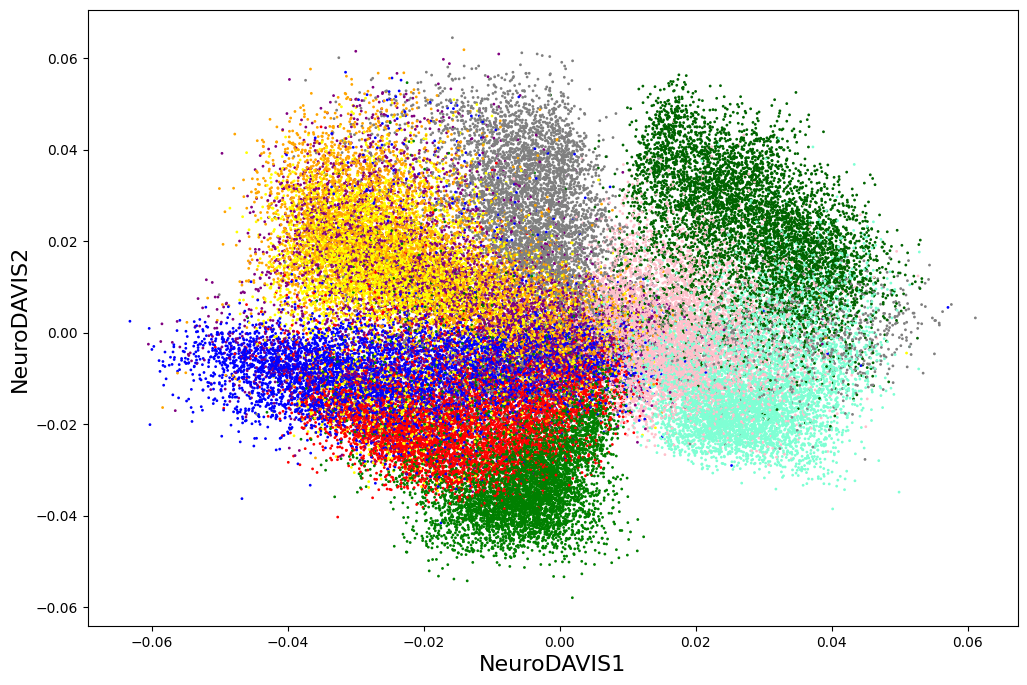

In [10]:
import matplotlib.pyplot as plt
dir = 'D:/Research/NeuroDAVIS/Results/HD/Comparison/'
plt.figure(figsize=(12,8))
plt.scatter(X_NeuroDAVIS.iloc[:,0],X_NeuroDAVIS.iloc[:,1],c=cs,s=1)
plt.xlabel("NeuroDAVIS1", fontsize=16)
plt.ylabel("NeuroDAVIS2", fontsize=16)
plt.savefig(dir+'FMnist_NeuroDAVIS_60k.eps', dpi = 1200, format = 'eps')

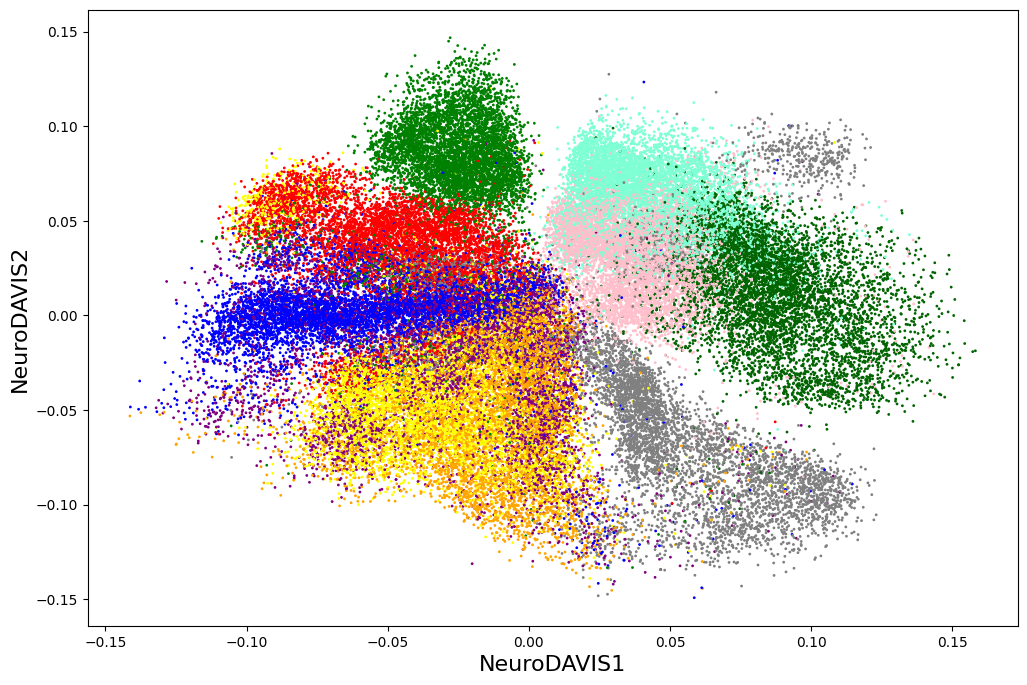

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca_NeuroDAVIS.iloc[:,0],X_pca_NeuroDAVIS.iloc[:,1],c=cs,s=1)
plt.xlabel("NeuroDAVIS1", fontsize=16)
plt.ylabel("NeuroDAVIS2", fontsize=16)
plt.savefig(dir+'FMnist_pca_NeuroDAVIS_60k.eps', dpi = 1200, format = 'eps')

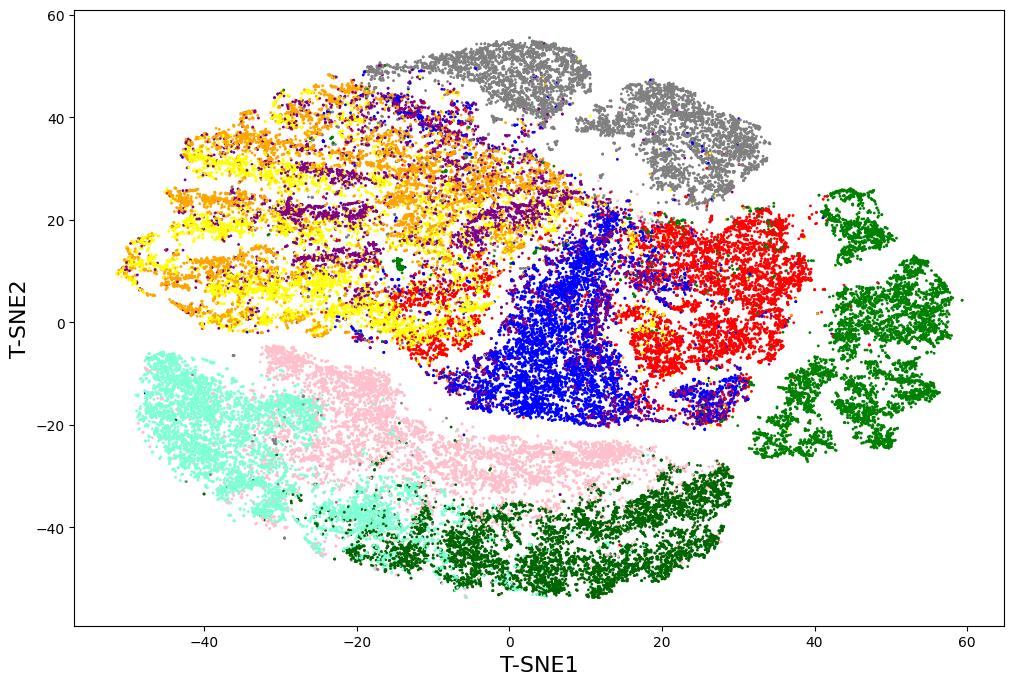

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(X_tsne.iloc[:,0],X_tsne.iloc[:,1],c=cs,s=1)
plt.xlabel("T-SNE1", fontsize=16)
plt.ylabel("T-SNE2", fontsize=16)
plt.savefig(dir+'FMnist_tSNE_60k.eps', dpi = 1200, format = 'eps')

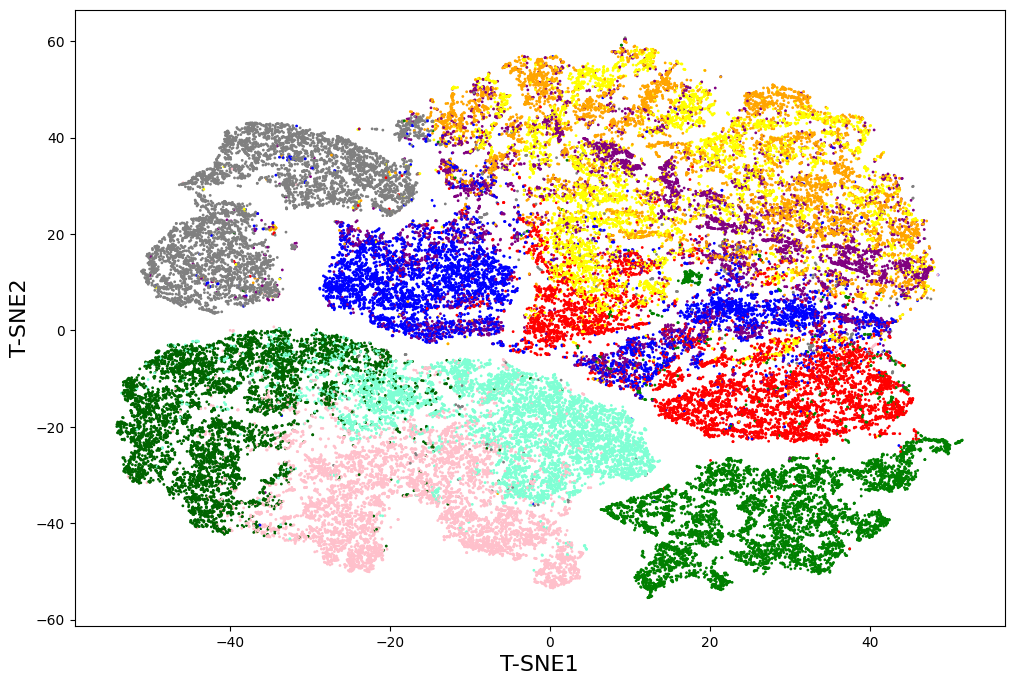

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca_tsne.iloc[:,0],X_pca_tsne.iloc[:,1],c=cs,s=1)
plt.xlabel("T-SNE1", fontsize=16)
plt.ylabel("T-SNE2", fontsize=16)
plt.savefig(dir+'FMnist_pca_tSNE_60k.eps', dpi = 1200, format = 'eps')

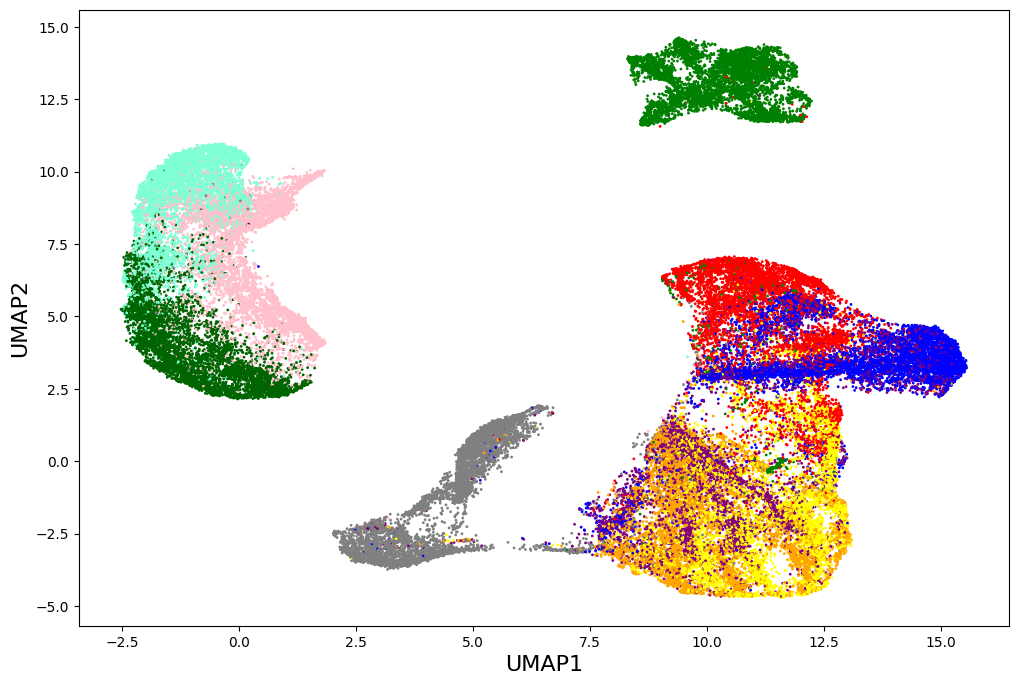

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(X_umap.iloc[:,0],X_umap.iloc[:,1],c=cs,s=1)
plt.xlabel("UMAP1", fontsize=16)
plt.ylabel("UMAP2", fontsize=16)
plt.savefig(dir+'FMnist_UMAP_60k.eps', dpi = 1200, format = 'eps')

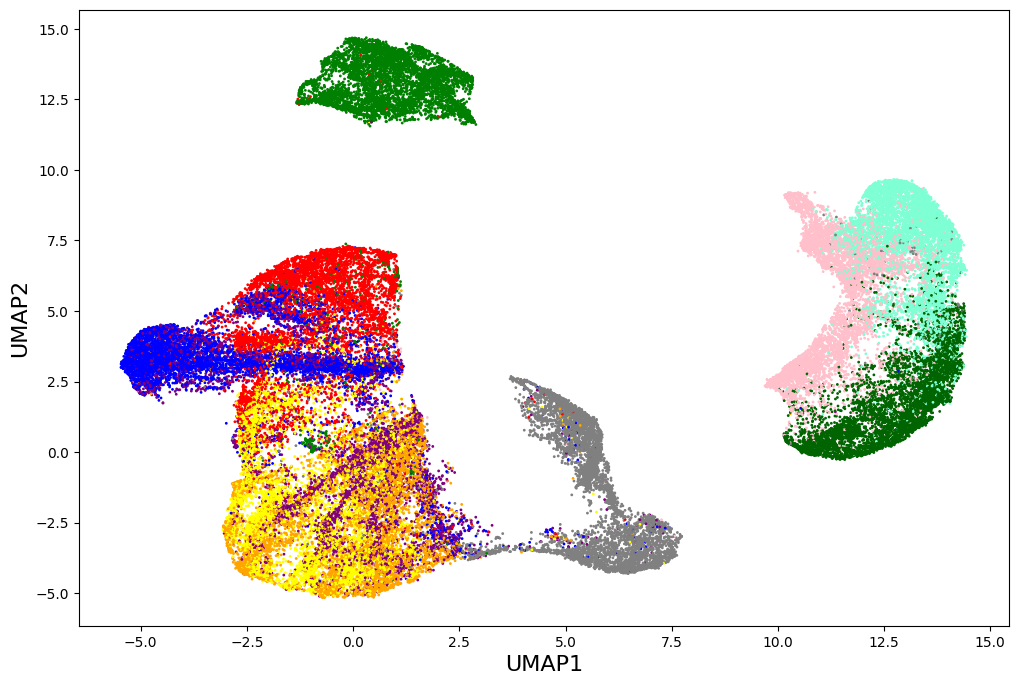

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca_umap.iloc[:,0],X_pca_umap.iloc[:,1],c=cs,s=1)
plt.xlabel("UMAP1", fontsize=16)
plt.ylabel("UMAP2", fontsize=16)
plt.savefig(dir+'FMnist_pca_UMAP_60k.eps', dpi = 1200, format = 'eps')